### SparklyRGT Template: Baseline and Acquisition Analysis 

**Requirements**
* The data must be an excel file from MEDPC2XL (trial by trial data) 
* The data, sparklyRGT.py file, and this notebook must all be in the same folder

**Getting started: Please make a copy of this (sparklyRGT_template_2) for each analysis**
- Refer to sparklyRGT_documentation for function information
- Note: depending on your analysis, you will only have to complete certain sections of the sparklyRGT_documentation
- Note: feel free to create a personal template once you've become comfortable - this is just an example

In [2]:
import sparklyRGT as rgt 
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import scipy.stats as stats
import model_data as md
pd.options.mode.chained_assignment = None
pd.set_option('display.max_rows',100)

I am being executed!


In [3]:
%load_ext autoreload
%autoreload 2

***

# 1) Load data into Python



In [4]:
#checks current working directory
os.getcwd()

#changes working directory to whatever is included in brackets
# os.chdir("C:\\Users\\dexte\\sparklyRGT\\data") 
os.chdir('/home/brett/sparklyRGT/data')

In [5]:
# #CH01 must be loaded in separately to drop the forced choice session that was accidentally included
# #for four rats

# fnames2 = ['CH01_raw-free_S8-19.xlsx']

# df2 = rgt.load_data(fnames2)
# #drop forced choice session:
# rgt.drop_sessions(df2, [6])
# #reset the session numbers to start from 1:
# rgt.edit_sessions(df2, orig_sess = list(range(8,20)),new_sess = list(range(1,13)))

In [6]:
# #set these variables for extracting the data using the model_data python script

# fnames = ['BH09_raw-free_S1-5_corrected.xlsx','CH02_raw-free_S8-15.xlsx','NA01_raw_free-choice_S8-18.xlsx']
# #change these to the names of the excel files that you want to run modeling on 

# #load in excel files into one df, resetting the session numbers to start at 1
# df1 = rgt.load_multiple_data(fnames, reset_sessions = True)



In [7]:
# rgt.check_sessions(df1)

In [8]:
# df = pd.concat([df1,df2], ignore_index = True)


In [9]:
fnames = ['BH09_raw-free_S1-5_corrected.xlsx','CH02_corrected.xlsx','NA01_raw_free-choice_S8-18.xlsx',"CH01_corrected.xlsx"]
df = rgt.load_multiple_data(fnames, reset_sessions = True)


In [10]:
#creates lists of subjects run on each task (classic A, classic B, etc.)

#rename MSNs so that the rats on the outcome task don't have "loss" in the MSN
for i in range(len(df)):
    if df.at[i, 'MSN'] == 'LossrGT_A-losscue_v1':
        df.at[i,'MSN'] = 'outcomeRGT_A'
    if df.at[i, 'MSN'] == 'LossrGT_B-losscue_v1':
        df.at[i,'MSN'] = 'outcomeRGT_B'
        
#rename MSNs so that the rats on the random task don't have "loss" in the MSN
for i in range(len(df)):
    if df.at[i,'MSN'] == 'AnarchyrGT_B-losscue_v6':
        df.at[i,'MSN'] = 'RandomRGT_B'
    if df.at[i,'MSN'] == 'AnarchyrGT_A-losscue_v6':
        df.at[i,'MSN'] = 'RandomRGT_A'
        
        
task_list = df.groupby(['MSN'])['Subject'].unique()

In [11]:
#these lines of code concatenates together the lists of subjects that run the same task (i.e., puts version A 
#and version B together) - based on unique string for each task name
uncued_subs = np.concatenate(task_list[[task for task in df.MSN.unique() if 'Classic' in task]])
standard_subs = np.concatenate((task_list['rGT_A-cue'], task_list['rGT_B-cue']))
#concatenating together MisRGT tasks, and RevRGT tasks, as they both refer to reverse-cue RGT
reverse_subs = np.concatenate((np.concatenate(task_list[[task for task in df.MSN.unique() if 'Mis' in task]]),
                              np.concatenate(task_list[[task for task in df.MSN.unique() if 'Rev' in task]])))
outcome_subs = np.concatenate(task_list[[task for task in df.MSN.unique() if 'outcome' in task]])
random_subs = np.concatenate(task_list[[task for task in df.MSN.unique() if 'Random' in task]])
loss_subs = np.concatenate(task_list[[task for task in df.MSN.unique() if 'oss' in task]])

subs = [uncued_subs,standard_subs, reverse_subs, outcome_subs,random_subs,loss_subs]

***
# 2A) Baseline & Acquisition Analysis


In [12]:
group_names = {0: 'uncued',
              1: 'cued',
              2: 'reverse',
              3: 'outcome',
              4: 'random', 
              5: 'loss'} 

group_list = [uncued_subs,standard_subs, reverse_subs, outcome_subs,random_subs,loss_subs]

title = 'Plot' #for plotting

startsess = 1 #first session you would like to include in figures
endsess = 5 #last session you would like to include in figures

## Data cleaning

### Check session numbers for each rat

In [ ]:
rgt.check_sessions(df)

### Drop/edit session numbers

In [ ]:
# df2 = rgt.drop_sessions(df, [6])
# df2 = rgt.edit_sessions(df, orig_sess = [0], new_sess = [15], subs = "all")

### Check that you dropped/edited the desired session(s)

In [ ]:
# rgt.check_sessions(df2) 

## Data processing

### Calculate variables for each rat


In [13]:
df_sum = rgt.get_summary_data(df) #change to df instead of df2 if you didn't do any session editing
df_sum.loc[:,'risk1':'risk5'] 

,risk1,risk2,risk3,risk4,risk5
101,84.6154,96.1039,95.6204,93.75,95.3125
102,70.297,79.5276,71.0843,78.3784,60
103,-96.3636,-3.61446,-19.3548,-15.7895,-27.5862
104,44,14.2857,9.09091,-21.7391,10.3448
105,29.8246,61.1111,72,97.2973,68
...,...,...,...,...,...
444,-4.34783,-34.8837,-1.63934,40.4255,2.32558
445,86.1386,67.9245,86.2745,96.1538,97.9381
446,-15.5556,-32.1429,1.36986,-7.14286,12
447,-15.0685,-41.3333,25.2525,13.9241,41.4141


### Get the risk status of the rats


In [ ]:
df_sum, risky, optimal = rgt.get_risk_status(df_sum, startsess, endsess)

print(df_sum[['mean_risk','risk_status']]) 
print(risky, optimal) 

### Export your data to an Excel file 


In [ ]:
rgt.export_to_excel(df_sum, groups = group_list, column_name = '', new_file_name = '', asin = True)

## Calculate means and SEMs for your experimental groups



In [14]:
mean_scores, SEM = rgt.get_means_sem(df_sum, groups = group_list, group_names = group_names)
mean_scores
# SEM

,1P1,1P2,1P3,1P4,2P1,2P2,2P3,2P4,3P1,3P2,...,prem3,prem4,prem5,prem6,prem7,prem8,prem9,prem10,prem11,prem12
uncued,38.5103,37.3686,14.3425,9.77854,38.7897,44.7755,8.91324,7.52165,37.2344,48.188,...,26.8854,21.6574,26.5633,22.9248,19.6032,18.2633,26.9221,24.1636,24.8914,23.6908
cued,32.3508,33.3322,18.4061,15.911,30.8003,35.0933,16.9034,17.203,28.0232,36.9881,...,31.2205,29.6074,33.8783,32.1835,33.7255,32.2708,35.7745,32.8765,30.9139,33.0943
reverse,34.5916,35.9486,18.0901,11.3697,33.9872,39.3344,16.8033,9.87513,32.7428,43.7344,...,25.6945,35.3521,33.1927,34.7989,34.5787,36.2332,38.2743,41.8362,32.2326,32.9955
outcome,24.7875,39.0196,22.4822,13.7107,26.5449,42.356,20,11.0992,23.301,46.0871,...,24.754,25.1327,28.2217,28.3729,36.0769,30.9646,NaN,NaN,NaN,NaN
random,41.4976,32.5706,14.727,11.2049,41.5945,35.6629,14.1222,8.62038,35.1432,44.1527,...,23.7079,23.6343,22.2134,14.2707,16.4128,12.7249,18.1693,22.8944,17.3933,NaN
loss,33.8815,42.2158,16.2889,7.61377,33.1778,48.9092,12.1985,5.71458,33.1741,53.0079,...,18.1324,17.1727,23.1957,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 2B) Baseline & Acquisition Analysis: Plotting


## Bar plot of P1-P4 % choice


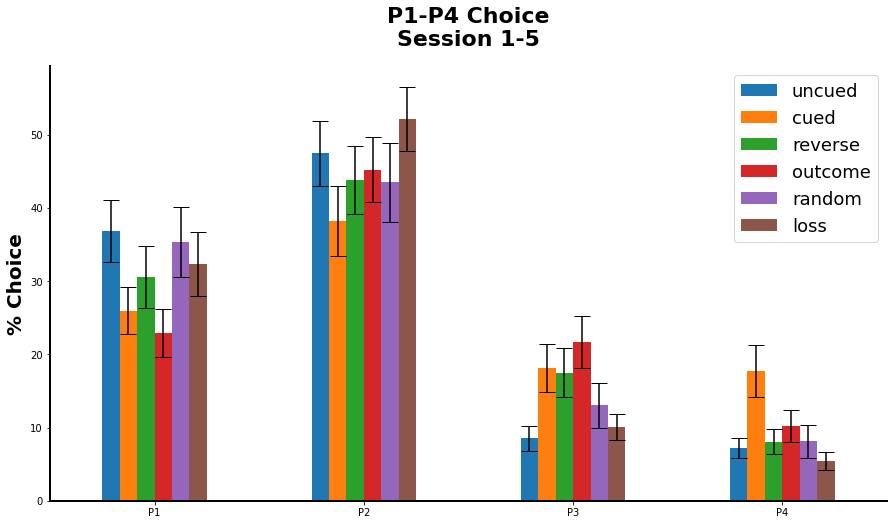

In [15]:
rgt.choice_bar_plot(startsess, endsess, mean_scores, SEM)

#To save figure:
# plt.savefig('BH07 Choice S29-30',facecolor = 'white')

## Line plot of other variables


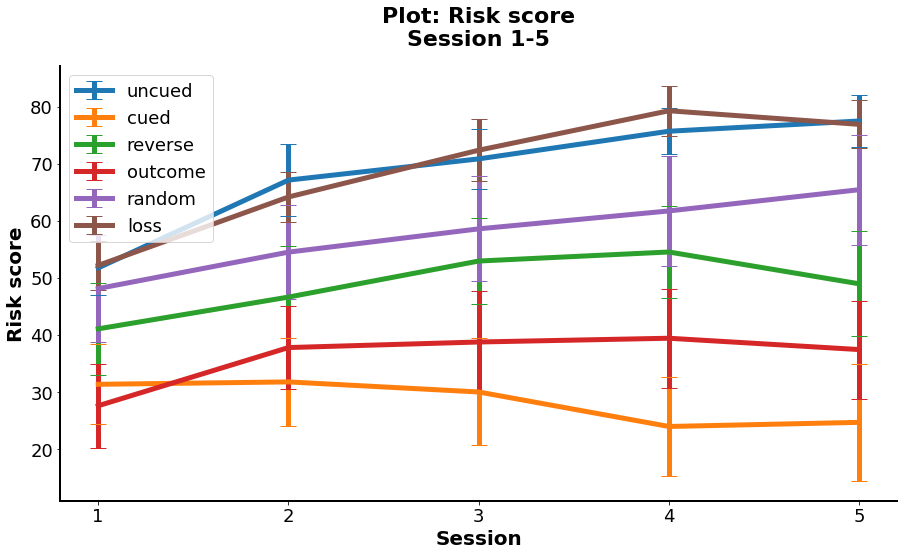

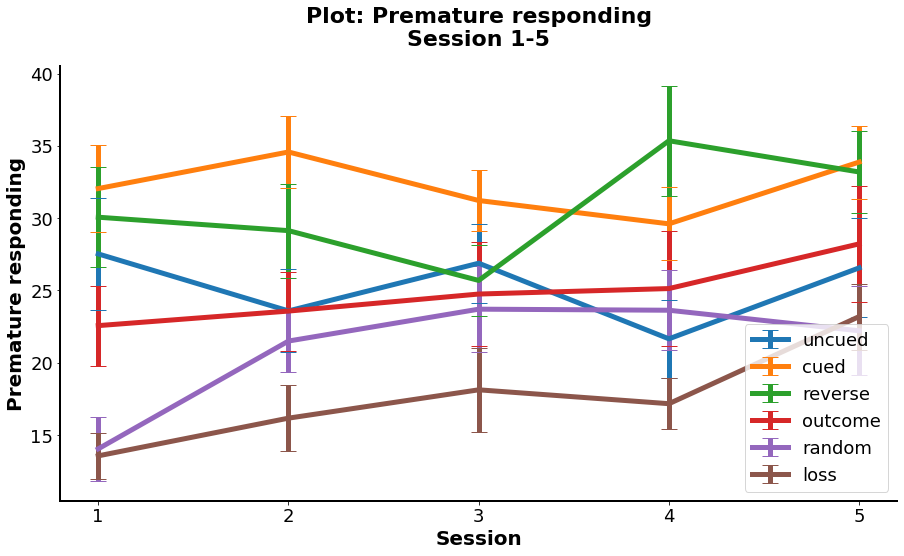

In [16]:
rgt.rgt_plot('risk', startsess, endsess, title, mean_scores, SEM, group_names = group_names, y_label = 'Risk score') 
plt.savefig('rgt variants - risk score S1-5',facecolor = 'white')

rgt.rgt_plot('prem', startsess, endsess, title, mean_scores, SEM, group_names = group_names, y_label = 'Premature responding') 

## Bar plot of other variables



I am being executed!


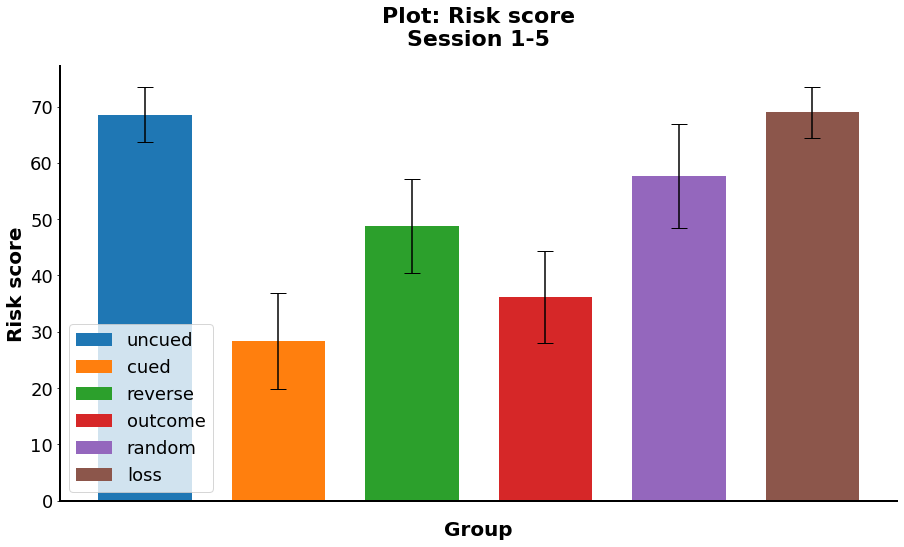

In [18]:
rgt.rgt_bar_plot('risk', startsess, endsess, title, mean_scores, SEM, group_names, y_label = 'Risk score')